# How to live Happy Married Life

In [141]:
# load the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
from itertools import islice
from textwrap import TextWrapper
# library to to independent sample t test 
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from tpot import TPOTClassifier
import xgboost as xgb
%matplotlib inline

In [148]:
!pipreqs --force .

INFO: Successfully saved requirements file in .\requirements.txt


In [146]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [81]:
# load the data
df = pd.read_excel("divorce.xlsx")
# print first few rows of the data
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [82]:
# check data types
df.dtypes

Atr1     int64
Atr2     int64
Atr3     int64
Atr4     int64
Atr5     int64
Atr6     int64
Atr7     int64
Atr8     int64
Atr9     int64
Atr10    int64
Atr11    int64
Atr12    int64
Atr13    int64
Atr14    int64
Atr15    int64
Atr16    int64
Atr17    int64
Atr18    int64
Atr19    int64
Atr20    int64
Atr21    int64
Atr22    int64
Atr23    int64
Atr24    int64
Atr25    int64
Atr26    int64
Atr27    int64
Atr28    int64
Atr29    int64
Atr30    int64
Atr31    int64
Atr32    int64
Atr33    int64
Atr34    int64
Atr35    int64
Atr36    int64
Atr37    int64
Atr38    int64
Atr39    int64
Atr40    int64
Atr41    int64
Atr42    int64
Atr43    int64
Atr44    int64
Atr45    int64
Atr46    int64
Atr47    int64
Atr48    int64
Atr49    int64
Atr50    int64
Atr51    int64
Atr52    int64
Atr53    int64
Atr54    int64
Class    int64
dtype: object

In [83]:
# check percentages of missing values
df.isnull().mean()

Atr1     0.0
Atr2     0.0
Atr3     0.0
Atr4     0.0
Atr5     0.0
Atr6     0.0
Atr7     0.0
Atr8     0.0
Atr9     0.0
Atr10    0.0
Atr11    0.0
Atr12    0.0
Atr13    0.0
Atr14    0.0
Atr15    0.0
Atr16    0.0
Atr17    0.0
Atr18    0.0
Atr19    0.0
Atr20    0.0
Atr21    0.0
Atr22    0.0
Atr23    0.0
Atr24    0.0
Atr25    0.0
Atr26    0.0
Atr27    0.0
Atr28    0.0
Atr29    0.0
Atr30    0.0
Atr31    0.0
Atr32    0.0
Atr33    0.0
Atr34    0.0
Atr35    0.0
Atr36    0.0
Atr37    0.0
Atr38    0.0
Atr39    0.0
Atr40    0.0
Atr41    0.0
Atr42    0.0
Atr43    0.0
Atr44    0.0
Atr45    0.0
Atr46    0.0
Atr47    0.0
Atr48    0.0
Atr49    0.0
Atr50    0.0
Atr51    0.0
Atr52    0.0
Atr53    0.0
Atr54    0.0
Class    0.0
dtype: float64

There are no missing values in the data and all the data are numeric

# check shape of data

In [84]:
# check value counts of the attributes
df.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [85]:
df.columns

Index(['Atr1', 'Atr2', 'Atr3', 'Atr4', 'Atr5', 'Atr6', 'Atr7', 'Atr8', 'Atr9',
       'Atr10', 'Atr11', 'Atr12', 'Atr13', 'Atr14', 'Atr15', 'Atr16', 'Atr17',
       'Atr18', 'Atr19', 'Atr20', 'Atr21', 'Atr22', 'Atr23', 'Atr24', 'Atr25',
       'Atr26', 'Atr27', 'Atr28', 'Atr29', 'Atr30', 'Atr31', 'Atr32', 'Atr33',
       'Atr34', 'Atr35', 'Atr36', 'Atr37', 'Atr38', 'Atr39', 'Atr40', 'Atr41',
       'Atr42', 'Atr43', 'Atr44', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49',
       'Atr50', 'Atr51', 'Atr52', 'Atr53', 'Atr54', 'Class'],
      dtype='object')

In [86]:
questions = "1. If one of us apologizes when our discussion deteriorates, the discussion ends.\
2. I know we can ignore our differences, even if things get hard sometimes.\
3. When we need it, we can take our discussions with my spouse from the beginning and correct it.\
4. When I discuss with my spouse, to contact him will eventually work.\
5. The time I spent with my wife is special for us.\
6. We don\'t have time at home as partners.\
7. We are like two strangers who share the same environment at home rather than family.\
8. I enjoy our holidays with my wife.\
9. I enjoy traveling with my wife.\
10. Most of our goals are common to my spouse.\
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.\
12. My spouse and I have similar values in terms of personal freedom.\
13. My spouse and I have similar sense of entertainment.\
14. Most of our goals for people (children, friends, etc.) are the same.\
15. Our dreams with my spouse are similar and harmonious.\
16. We\'re compatible with my spouse about what love should be.\
17. We share the same views about being happy in our life with my spouse\
18. My spouse and I have similar ideas about how marriage should be\
19. My spouse and I have similar ideas about how roles should be in marriage\
20. My spouse and I have similar values in trust.\
21. I know exactly what my wife likes.\
22. I know how my spouse wants to be taken care of when she/he sick.\
23. I know my spouse\'s favorite food.\
24. I can tell you what kind of stress my spouse is facing in her/his life.\
25. I have knowledge of my spouse\'s inner world.\
26. I know my spouse\'s basic anxieties.\
27. I know what my spouse\'s current sources of stress are.\
28. I know my spouse\'s hopes and wishes.\
29. I know my spouse very well.\
30. I know my spouse\'s friends and their social relationships.\
31. I feel aggressive when I argue with my spouse.\
32. When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .\
33. I can use negative statements about my spouse\'s personality during our discussions.\
34. I can use offensive expressions during our discussions.\
35. I can insult my spouse during our discussions.\
36. I can be humiliating when we discussions.\
37. My discussion with my spouse is not calm.\
38. I hate my spouse\'s way of open a subject.\
39. Our discussions often occur suddenly.\
40. We\'re just starting a discussion before I know what\'s going on.\
41. When I talk to my spouse about something, my calm suddenly breaks.\
42. When I argue with my spouse, ı only go out and I don\'t say a word.\
43. I mostly stay silent to calm the environment a little bit.\
44. Sometimes I think it\'s good for me to leave home for a while.\
45. I\'d rather stay silent than discuss with my spouse.\
46. Even if I\'m right in the discussion, I stay silent to hurt my spouse.\
47. When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.\
48. I feel right in our discussions.\
49. I have nothing to do with what I\'ve been accused of.\
50. I\'m not actually the one who\'s guilty about what I'm accused of.\
51. I\'m not the one who\'s wrong about problems at home.\
52. I wouldn't hesitate to tell my spouse about her/his inadequacy.\
53. When I discuss, I remind my spouse of her/his inadequacy.\
54. I\'m not afraid to tell my spouse about her/his incompetence."

In [87]:
questions = re.split(r"[0-9]{1,2}.", questions)
questions

['',
 ' If one of us apologizes when our discussion deteriorates, the discussion ends.',
 ' I know we can ignore our differences, even if things get hard sometimes.',
 ' When we need it, we can take our discussions with my spouse from the beginning and correct it.',
 ' When I discuss with my spouse, to contact him will eventually work.',
 ' The time I spent with my wife is special for us.',
 " We don't have time at home as partners.",
 ' We are like two strangers who share the same environment at home rather than family.',
 ' I enjoy our holidays with my wife.',
 ' I enjoy traveling with my wife.',
 ' Most of our goals are common to my spouse.',
 ' I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.',
 ' My spouse and I have similar values in terms of personal freedom.',
 ' My spouse and I have similar sense of entertainment.',
 ' Most of our goals for people (children, friends, etc.) are the same.',
 ' Our dreams with 

In [88]:
questions

['',
 ' If one of us apologizes when our discussion deteriorates, the discussion ends.',
 ' I know we can ignore our differences, even if things get hard sometimes.',
 ' When we need it, we can take our discussions with my spouse from the beginning and correct it.',
 ' When I discuss with my spouse, to contact him will eventually work.',
 ' The time I spent with my wife is special for us.',
 " We don't have time at home as partners.",
 ' We are like two strangers who share the same environment at home rather than family.',
 ' I enjoy our holidays with my wife.',
 ' I enjoy traveling with my wife.',
 ' Most of our goals are common to my spouse.',
 ' I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.',
 ' My spouse and I have similar values in terms of personal freedom.',
 ' My spouse and I have similar sense of entertainment.',
 ' Most of our goals for people (children, friends, etc.) are the same.',
 ' Our dreams with 

In [89]:
# Trim whitespace and drop empty string
questions = [question.strip() for question in questions if question != ""]
print(questions[1:5])
print(len(questions))

['I know we can ignore our differences, even if things get hard sometimes.', 'When we need it, we can take our discussions with my spouse from the beginning and correct it.', 'When I discuss with my spouse, to contact him will eventually work.', 'The time I spent with my wife is special for us.']
54


In [90]:
# make titles text wrap
tw = TextWrapper()
tw.width = 40

questions = ["\n".join(tw.wrap(text)) for text in questions ]

In [91]:
# make column names lowercase
df.columns = map(str.lower, df.columns)

In [92]:
# make dictionary of questions and variables column names
quetions_list = dict(zip(df.columns, questions))

In [93]:
# print first few questions
list(islice(quetions_list.items(),3))

[('atr1',
  'If one of us apologizes when our\ndiscussion deteriorates, the discussion\nends.'),
 ('atr2',
  'I know we can ignore our differences,\neven if things get hard sometimes.'),
 ('atr3',
  'When we need it, we can take our\ndiscussions with my spouse from the\nbeginning and correct it.')]

In [94]:
# recode married and divorced couple

In [95]:
df["class"].value_counts()

0    86
1    84
Name: class, dtype: int64

In [96]:
divorced = df[df["class"] == 1]
married = df[df["class"] == 0]

In [97]:
df["class"].value_counts()

0    86
1    84
Name: class, dtype: int64

In [98]:
df['class'] = df["class"].map({0:"Happily Married",  1:"Divorced"})

Now we'll recode the variables values 0-4 scale to -2 to 2 to make the scale biploar

In [99]:
df_new = df.drop(['class'],axis = 1).apply(lambda x: x.map({0:-2,1:-1,2:0,3:1,4:2}))

In [100]:
# add class
df_new['class'] = df['class']

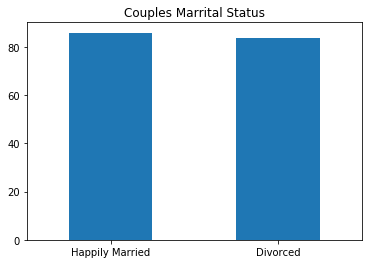

In [101]:
df["class"].value_counts().plot(kind='bar')
plt.title("Couples Marrital Status")
plt.xticks(rotation = 0)
plt.show()

## Question 1
1. Are there significant difference between Happily Married and Divorced couples?

In [102]:
df_new['atr1'].value_counts()

-2    69
 1    47
 2    31
 0    14
-1     9
Name: atr1, dtype: int64

In [103]:
df_mean = df_new.groupby(['class']).mean()

In [104]:
df_mean

,atr1,atr2,atr3,atr4,atr5,atr6,atr7,atr8,atr9,atr10,...,atr45,atr46,atr47,atr48,atr49,atr50,atr51,atr52,atr53,atr54
class,,,,,,,,,,,,,,,,,,,,,
Divorced,1.190476,0.869048,0.916667,0.726190,1.011905,-0.869048,-1.011905,0.809524,0.892857,0.773810,...,1.285714,1.166667,1.321429,1.452381,1.511905,1.500000,1.357143,1.488095,1.321429,1.369048
Happily Married,-1.604651,-1.534884,-1.360465,-1.732558,-1.895349,-1.627907,-1.988372,-1.872093,-1.941860,-1.593023,...,-0.348837,-0.046512,-0.755814,0.046512,-0.720930,-0.616279,-0.383721,-0.430233,-0.813953,-1.313953


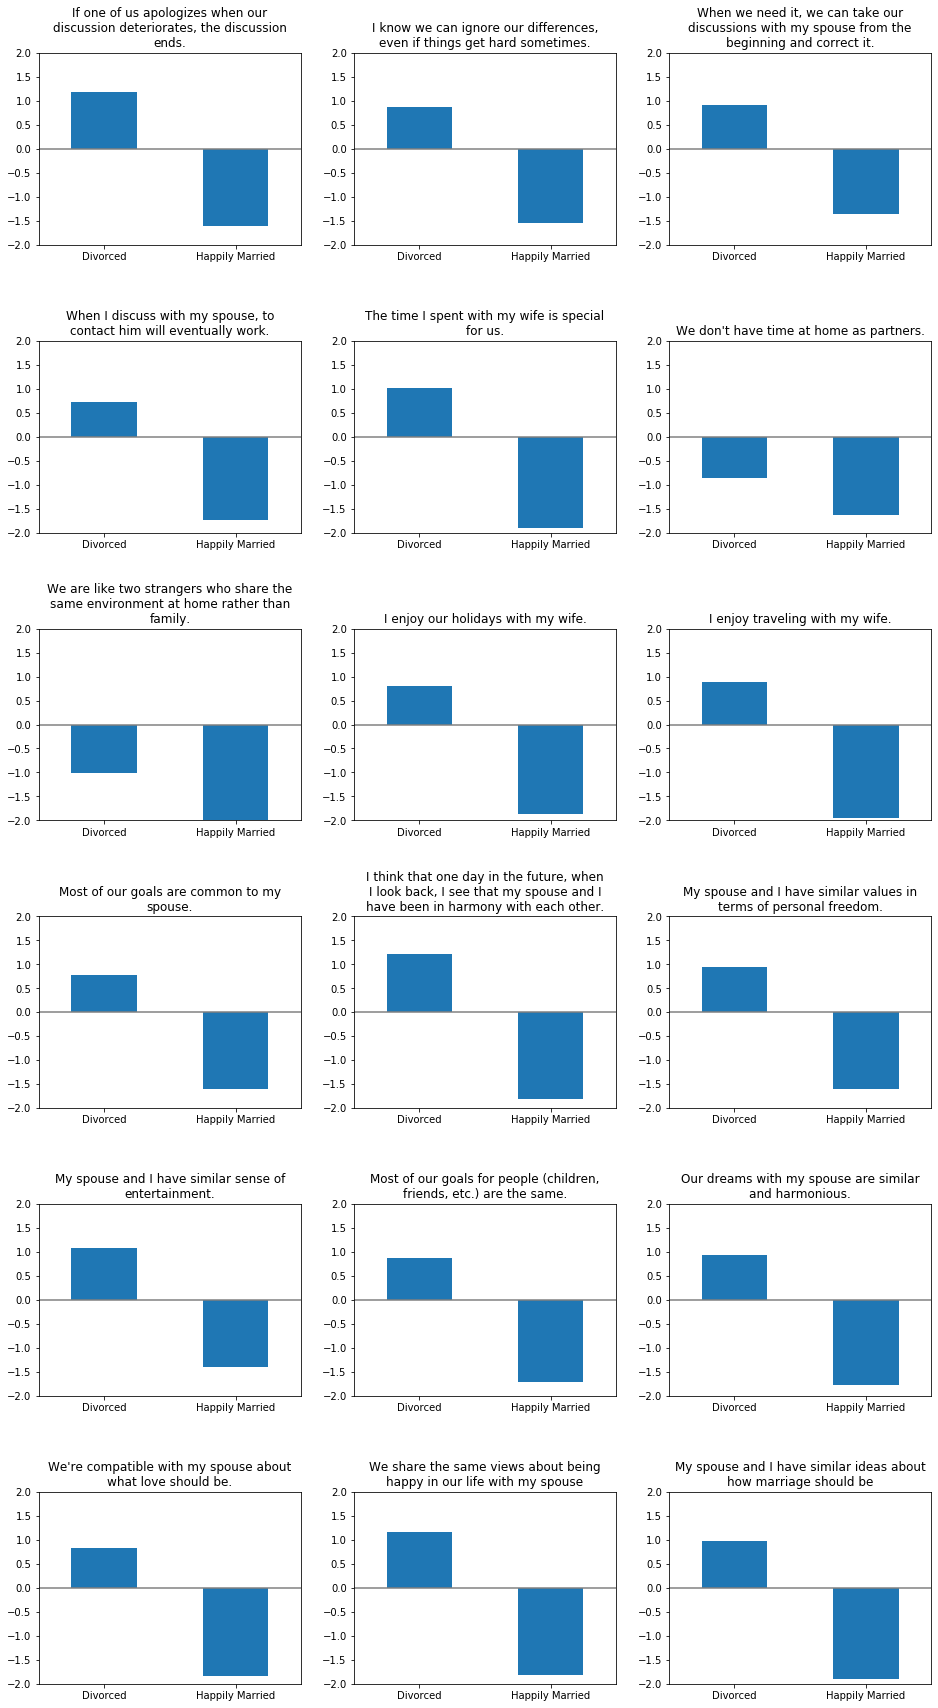

In [105]:
fig, axs = plt.subplots(6, 3, figsize=[16, 30])

# make plots of all the variables
for num in range(1,19):
    plt.subplot(6,3,num)
    plt.subplots_adjust(hspace = 0.5)
    axs = df_mean[df.columns[num-1]].plot(kind='bar')
    
    plt.title(quetions_list[df.columns[num-1]])
    plt.xticks(rotation = 0)
    plt.xlabel("")
#     plt.ylabel("Disagree\t\tNeutral\t\t\t  Agree".expandtabs())
    plt.ylim(-2,2)
    plt.axhline(y=0, color='gray', linestyle='-')
plt.show()

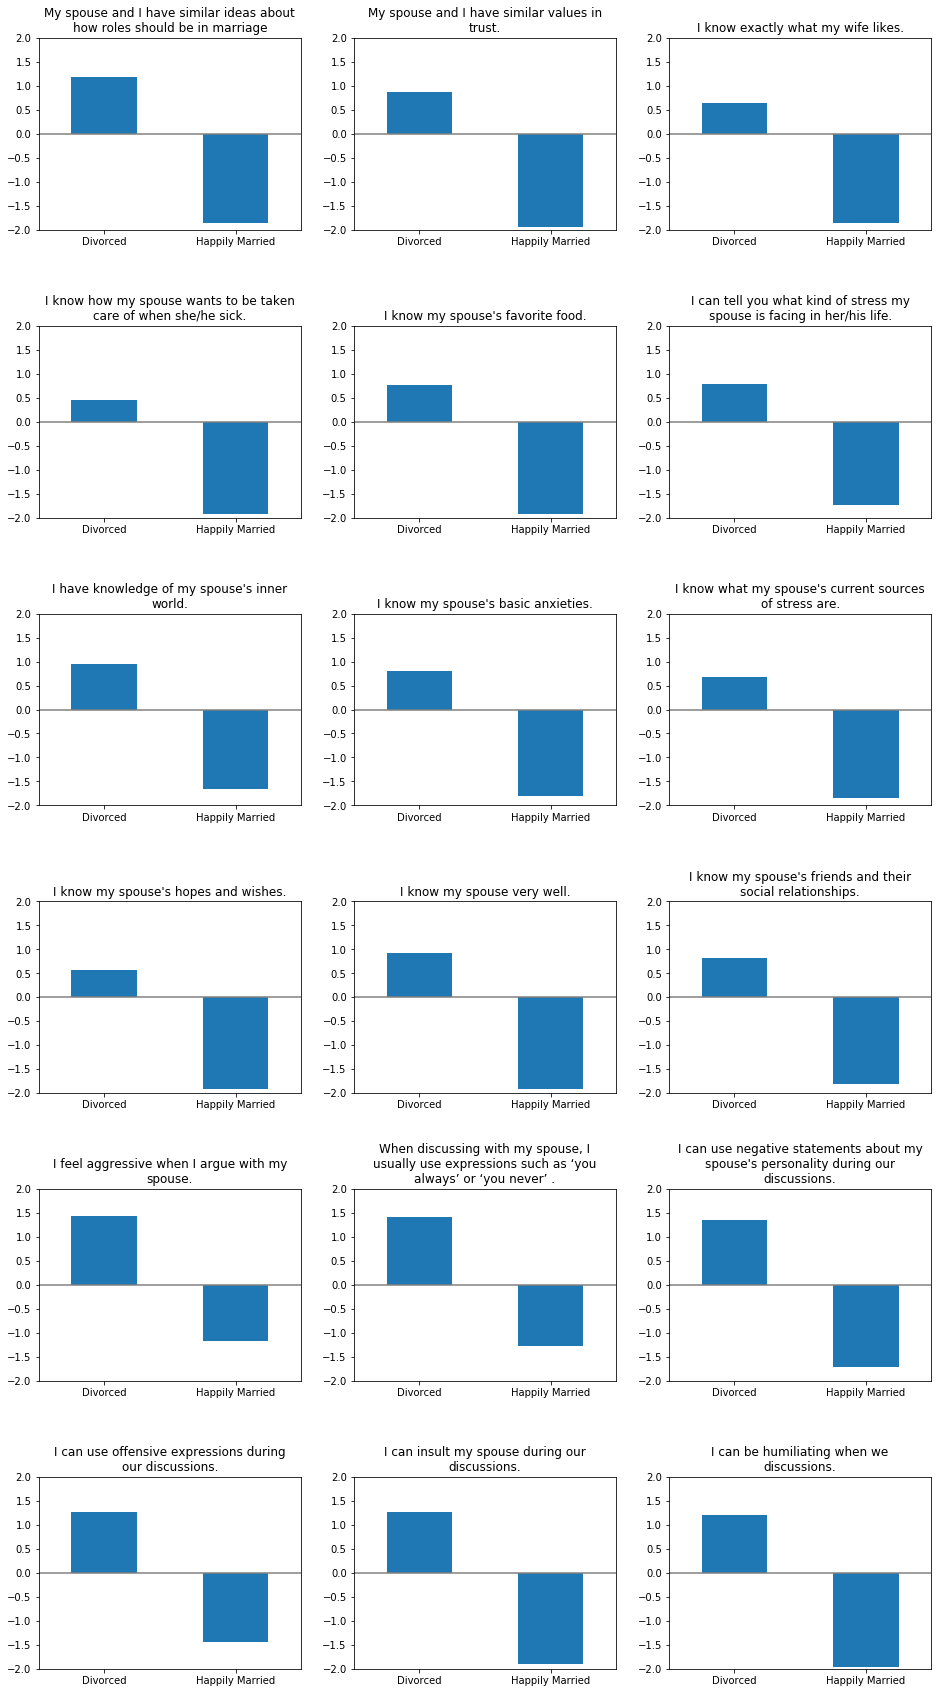

In [106]:
fig, axs = plt.subplots(6, 3,figsize=[16, 30])

for num in range(18,36):
    plot_location = num%18+1
    plt.subplot(6,3,plot_location)
    plt.subplots_adjust(hspace = 0.5)

    axs = df_mean[df.columns[num]].plot(kind='bar')
    plt.title(quetions_list[df.columns[num]])
    plt.xticks(rotation = 0)
    plt.xlabel("")
#     plt.ylabel("Disagree\t\tNeutral\t\t\t  Agree".expandtabs())
    plt.ylim(-2,2)
    plt.axhline(y=0, color='gray', linestyle='-')
plt.show()

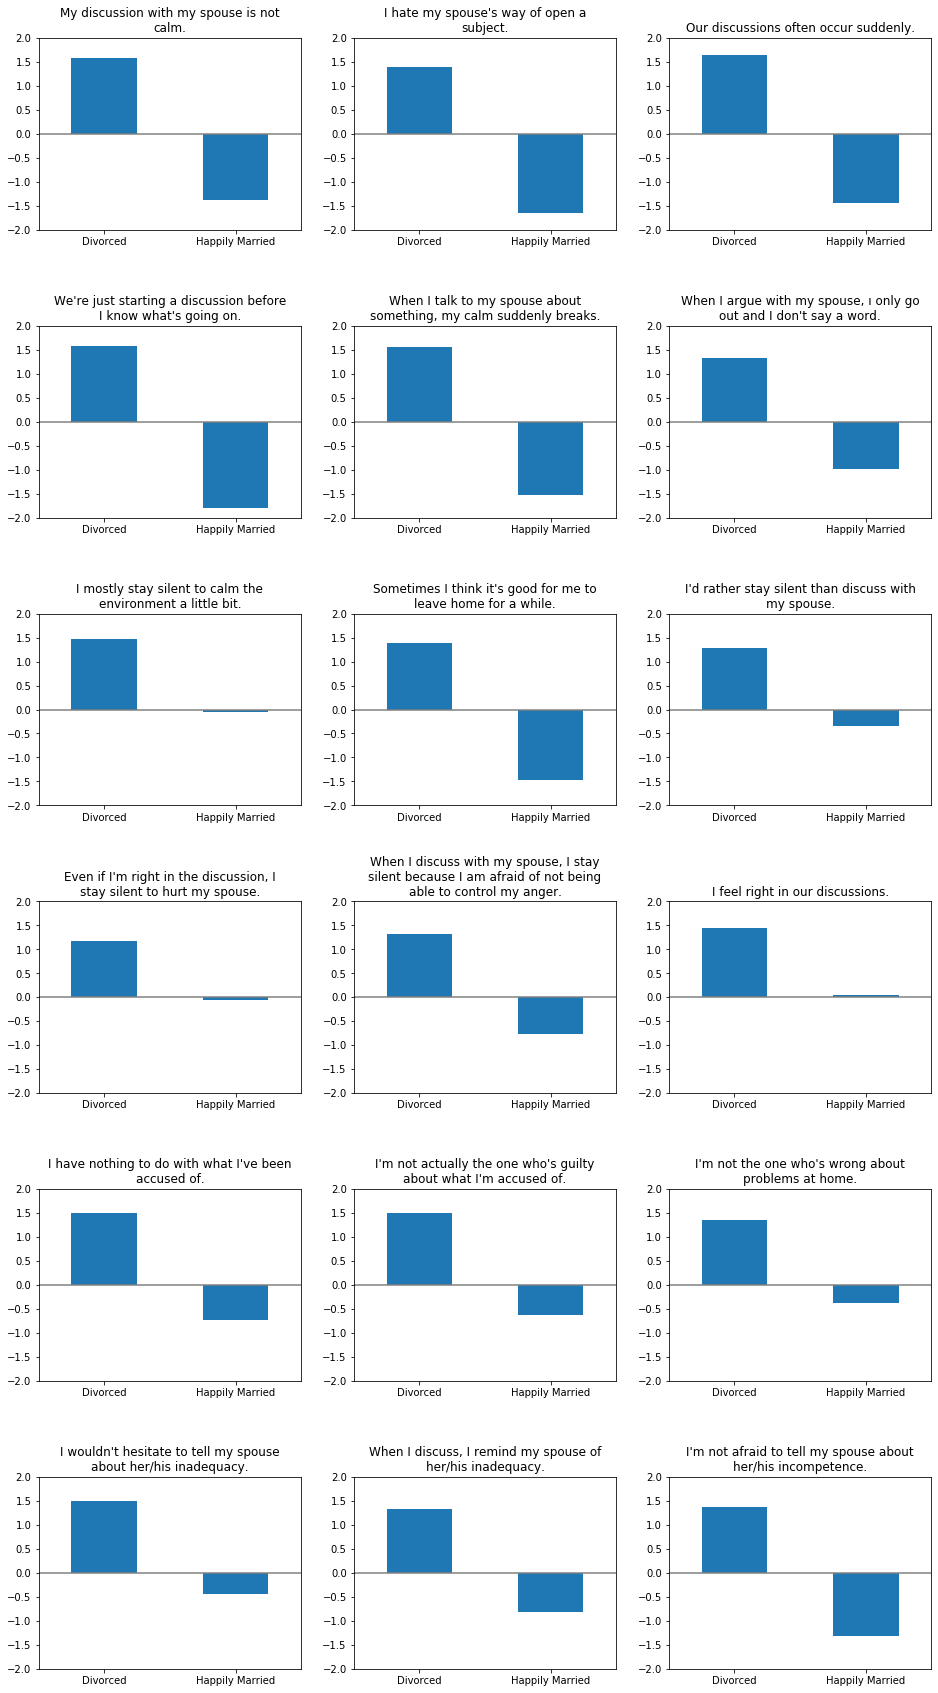

In [107]:
fig, axs = plt.subplots(6, 3,figsize=[16, 30])

for num in range(36,54):
    plot_location = num%18+1
    plt.subplot(6,3,plot_location)
    plt.subplots_adjust(hspace = 0.5)

    axs = df_mean[df.columns[num]].plot(kind='bar')
    plt.xticks(rotation = 0)
    plt.title(quetions_list[df.columns[num]])
    plt.xlabel("")
#     plt.ylabel("Disagree\t\tNeutral\t\t\t  Agree".expandtabs())
    plt.ylim(-2,2)
    plt.axhline(y=0, color='gray', linestyle='-')
plt.show()

Among the 54 questions married and divorced both couples on average gave a similar opinion about having time at home for partners, feeling right in their discussions.
In all other 52 questions, their average responses were in opposite directions.

## run tests between two groups

In [108]:
chi2_contingency(df.groupby('class')['atr1'].value_counts())

(0.0, 1.0, 0, array([45., 29.,  8.,  1.,  1., 68.,  8.,  6.,  2.,  2.]))

For all questions asked here we'll now do chi square tests of independence to see statistical difference.

For all the tests the the  hypothesis will be

$Null Hypothesis_{i}$: There is no difference between divorced and happily married couple for ith quesiton
    
$Alternative Hypothesis_{i}$: There is significant difference between divorced and happily married couple for ith quesiton

In [109]:
chi2_results =[]
for column in df_new.drop('class', axis = 1).columns:
    df_cross_tab = pd.crosstab(df_new[column],df_new['class'])
    chi2, p, dof, ex = chi2_contingency(df_cross_tab)
    chi2_results.append(p<0.05)
#     print(p<0.05)
chi2_results

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

At 5% level of significant since all the p values are less than 0.05 we reject all the hypothesis and conclude that between married and divorced couples there exists significant difference for all the questions. 

## Question 2
2. What are the most agreed and disagreed things between the couplse?

In [110]:
df_mean_orig = df.groupby(['class']).mean()

In [111]:
df_mean_transposed = df_mean.T

In [112]:
df_mean_transposed['diff'] = df_mean_transposed['Divorced'] + df_mean_transposed['Happily Married']

In [113]:
df_mean_orig = df_mean_orig.T

In [114]:
df_mean_orig['diff'] = df_mean_orig['Divorced'] + df_mean_orig['Happily Married']

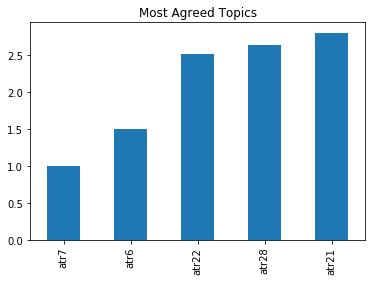

In [115]:
df_mean_orig['diff'].sort_values(ascending=True)[0:5].plot(kind='bar')
plt.title("Most Agreed Topics");

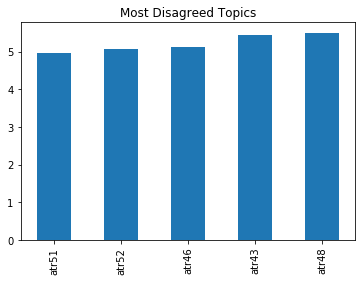

In [116]:
df_mean_orig['diff'].sort_values(ascending=True)[-5:].plot(kind='bar')
plt.title("Most Disagreed Topics");

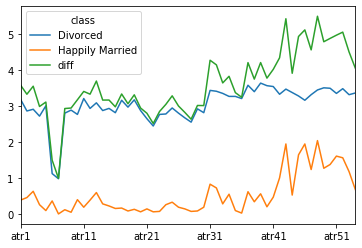

In [117]:
df_mean_orig.plot()

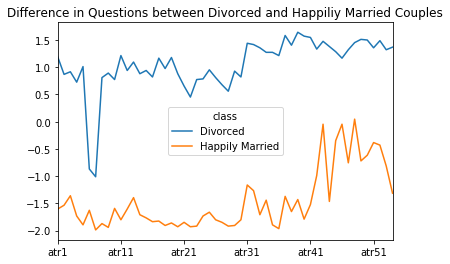

In [118]:
df_mean.T.plot()
plt.title("Difference in Questions between Divorced and Happiliy Married Couples");

## Question 3
3. What couples needs to focus most in order to prevent divorce?

In [119]:
# seperate the data in X and Y
X =  df.drop("class",axis = 1)
y = df["class"].map({"Happily Married":0, "Divorced": 1})

In [120]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,shuffle=True, test_size=0.30,random_state = 1111 )

In [121]:
# build randomforest model
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 50, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 20, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [2, 4, 7, 9, 12, 14, 17, 19, 22, 24, 27, 29, 32, 34, 37, 39, 42, 44, 47, 50], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [122]:
# do k fold cross validation

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf,return_train_score=True,refit=True, param_distributions = random_grid, n_iter = 100, cv =5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.8s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [123]:
X.columns

Index(['atr1', 'atr2', 'atr3', 'atr4', 'atr5', 'atr6', 'atr7', 'atr8', 'atr9',
       'atr10', 'atr11', 'atr12', 'atr13', 'atr14', 'atr15', 'atr16', 'atr17',
       'atr18', 'atr19', 'atr20', 'atr21', 'atr22', 'atr23', 'atr24', 'atr25',
       'atr26', 'atr27', 'atr28', 'atr29', 'atr30', 'atr31', 'atr32', 'atr33',
       'atr34', 'atr35', 'atr36', 'atr37', 'atr38', 'atr39', 'atr40', 'atr41',
       'atr42', 'atr43', 'atr44', 'atr45', 'atr46', 'atr47', 'atr48', 'atr49',
       'atr50', 'atr51', 'atr52', 'atr53', 'atr54'],
      dtype='object')

In [124]:
# select important features
feature_importances = rf_random.best_estimator_.feature_importances_

In [125]:
feature_df = pd.DataFrame({"Importance":feature_importances,"Questions":list(quetions_list.values())},index=X.columns)
feature_df.sort_values(['Importance'],ascending=False)[1:10]

,Importance,Questions
atr19,0.124683,My spouse and I have similar ideas about\nhow ...
atr17,0.103049,We share the same views about being\nhappy in ...
atr26,0.098547,I know my spouse's basic anxieties.
atr16,0.091912,We're compatible with my spouse about\nwhat lo...
atr25,0.074215,I have knowledge of my spouse's inner\nworld.
atr14,0.067749,"Most of our goals for people (children,\nfrien..."
atr11,0.038396,"I think that one day in the future, when\nI lo..."
atr40,0.037468,We're just starting a discussion before\nI kno...
atr15,0.034281,Our dreams with my spouse are similar\nand har...


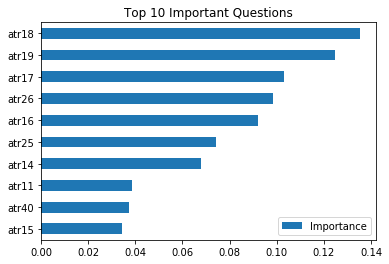

In [154]:
feature_df.sort_values(['Importance'],ascending =True)[-10:].plot(kind='barh');
plt.title("Top 10 Important Questions");

In [127]:
feature_df.sort_values(['Importance'],ascending=False)

,Importance,Questions
atr18,0.135277,My spouse and I have similar ideas about\nhow ...
atr19,0.124683,My spouse and I have similar ideas about\nhow ...
atr17,0.103049,We share the same views about being\nhappy in ...
atr26,0.098547,I know my spouse's basic anxieties.
atr16,0.091912,We're compatible with my spouse about\nwhat lo...
atr25,0.074215,I have knowledge of my spouse's inner\nworld.
atr14,0.067749,"Most of our goals for people (children,\nfrien..."
atr11,0.038396,"I think that one day in the future, when\nI lo..."
atr40,0.037468,We're just starting a discussion before\nI kno...
atr15,0.034281,Our dreams with my spouse are similar\nand har...


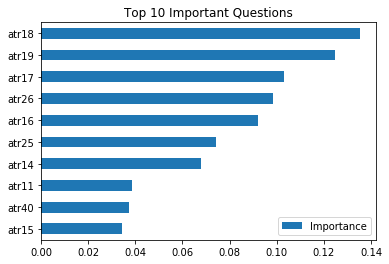

In [128]:
feature_df.sort_values(['Importance'])[-10:].plot(kind='barh');
plt.title("Top 10 Important Questions");

In [129]:
question_index = feature_df.sort_values(['Importance'])[-10:].index

In [130]:
question_index

Index(['atr15', 'atr40', 'atr11', 'atr14', 'atr25', 'atr16', 'atr26', 'atr17',
       'atr19', 'atr18'],
      dtype='object')

In [131]:
dict((k, quetions_list[k]) for k in question_index)


{'atr15': 'Our dreams with my spouse are similar\nand harmonious.',
 'atr40': "We're just starting a discussion before\nI know what's going on.",
 'atr11': 'I think that one day in the future, when\nI look back, I see that my spouse and I\nhave been in harmony with each other.',
 'atr14': 'Most of our goals for people (children,\nfriends, etc.) are the same.',
 'atr25': "I have knowledge of my spouse's inner\nworld.",
 'atr16': "We're compatible with my spouse about\nwhat love should be.",
 'atr26': "I know my spouse's basic anxieties.",
 'atr17': 'We share the same views about being\nhappy in our life with my spouse',
 'atr19': 'My spouse and I have similar ideas about\nhow roles should be in marriage',
 'atr18': 'My spouse and I have similar ideas about\nhow marriage should be'}

Knowing spouses favorite food, basic anxieties, knowledge of the spouse's inner world, stress faced by the spouse is important. 
In terms of discussion setting aside work is important. Staying calm during the conversation with the spouse is important. 
In terms of travel both need to make traveling together enjoyable. Both need to have similar goals in terms of people(children, friends, etc.)
In terms of trust both need to have similar values. 
Before something goes wrong spouses should start the discussion.

## Question 4
4. How accuratley we can predict future divorce?

##  logistic regression model

In [132]:
# logistic regression model
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)
predicted = clf.predict(X_train)
print(accuracy_score(y_train, predicted))
predicted = clf.predict(X_test)
print(accuracy_score(y_test, predicted))

0.9747899159663865
0.9803921568627451


## Random Forest Classifier

In [133]:
predicted = rf_random.predict(X_train)
print(accuracy_score(y_train, predicted))
predicted = rf_random.predict(X_test)
print(accuracy_score(y_test, predicted))

1.0
0.9803921568627451


## K Nearest Neighbors

In [134]:

#create new a knn model
knn = KNeighborsClassifier()
# create parameter grid
param_grid = {"n_neighbors": np.arange(1, 20)}
# do grid serach
knn_cv = GridSearchCV(knn, param_grid, cv=5)

# fit model
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [135]:
knn_cv.best_score_

0.9742753623188406

In [136]:
knn_cv.best_params_

{'n_neighbors': 1}

In [137]:
predicted = knn_cv.predict(X_train)
print(accuracy_score(y_train, predicted))
predicted = knn_cv.predict(X_test)
print(accuracy_score(y_test, predicted))

1.0
0.9803921568627451


## Automated Classifier using TPOT

In [138]:
# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=3, population_size=4,
                          offspring_size=3, scoring="accuracy",
                          verbosity=2, random_state=42, cv=5)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the training set
print(tpot_clf.score(X_train, y_train))
# Score on the test set
print(tpot_clf.score(X_test, y_test))

Generation 1 - Current best internal CV score: 0.9742753623188406
Generation 2 - Current best internal CV score: 0.9742753623188406
Generation 3 - Current best internal CV score: 0.9829710144927537

Best pipeline: RandomForestClassifier(Normalizer(RFE(input_matrix, criterion=entropy, max_features=0.1, n_estimators=100, step=0.15000000000000002), norm=max), bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)
0.9831932773109243
0.9803921568627451


In [139]:
# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=20, population_size=10,
                          offspring_size=10, scoring="accuracy",
                          verbosity=2, random_state=42, cv=5)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the training set
print(tpot_clf.score(X_train, y_train))
# Score on the test set
print(tpot_clf.score(X_test, y_test))

Generation 1 - Current best internal CV score: 0.9742753623188406
Generation 2 - Current best internal CV score: 0.9826086956521738
Generation 3 - Current best internal CV score: 0.9829710144927537
Generation 4 - Current best internal CV score: 0.9829710144927537
Generation 5 - Current best internal CV score: 0.9829710144927537
Generation 6 - Current best internal CV score: 0.9829710144927537
Generation 7 - Current best internal CV score: 0.9829710144927537
Generation 8 - Current best internal CV score: 0.9829710144927537
Generation 9 - Current best internal CV score: 0.9913043478260869
Generation 10 - Current best internal CV score: 0.9916666666666668
Generation 11 - Current best internal CV score: 0.9916666666666668
Generation 12 - Current best internal CV score: 0.9916666666666668
Generation 13 - Current best internal CV score: 0.9916666666666668
Generation 14 - Current best internal CV score: 0.9916666666666668
Generation 15 - Current best internal CV score: 0.9916666666666668
Gene

In [140]:
# build a daaframe of the model accuracies
results = pd.DataFrame({"Model":[],"Training Accuracy","Test Accuracy"})

SyntaxError: invalid syntax (<ipython-input-140-2cc6dd57a854>, line 2)

In [ ]:
# show model acccuracy